In [1]:
#import libraries
import pandas as pd
from textblob import TextBlob
import nltk
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import string
import preprocessor as p
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns



In [2]:
#read the data
df=pd.read_csv('Swiggy Dataset - Sheet1.csv')

In [3]:
#Top 5 data
df.head()

date  favorite_count  followers_count  friends_count  \
0  7/18/2019 22:47               0               82            219   
1  7/18/2019 22:43               0              102            129   
2  7/18/2019 22:37               0              102            129   
3  7/18/2019 22:35               0               13             16   
4  7/18/2019 22:25               0              102            129   

                                           full_text  retweet_count retweeted  \
0  @Mahi_2510 @swiggy_in The ultimate answer will...              0     False   
1                            @SwiggyCares I hope so.              0     False   
2  @SwiggyCares I think you have the order detail...              0     False   
3  @swiggy_in People are complaining here also, i...              0     False   
4  @SwiggyCares Do you even know the meaning of y...              0     False   

     screen_name tweet_id                  user_id  
0     syamantak1        1               61,959,419  
1  Bharatbbhushn        2              143,284,383  
2  Bharatbbhushn        3              143,284,383  
3   taifkhalid01        4  830,340,000,000,000,000  
4  Bharatbbhushn        5              143,284,383

In [4]:
#Columns of the dataset
df.columns.values

array(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name',
       'tweet_id', 'user_id'], dtype=object)

In [5]:
#no of records
df.shape[0]

16712

In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        14384 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  object
 9   user_id          16712 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [7]:
#find missing value
df.isna().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [8]:
#filling the missing value
df=df.fillna(0)

In [9]:
#update the retweeted column
def value_update(a):
    if a>0:
        return True
    else:
        return False
df['retweeted']=df['retweet_count'].apply(value_update)        

In [10]:
#find duplicate value
df.duplicated().sum()

0

# Sentiment Analysis

#Text pre-processing

In [11]:
# Converting lower
def convertinglower(text):
    return text.lower()
df['full_text']=df['full_text'].apply(convertinglower)

In [12]:
# clean data
def cleantweet(text):
    text=re.sub(r'@[A-Za-z]+\w[0-9a-z]*','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'(https?:\/\/\S+)','',text)
    text=re.sub(r'(swiggy)','',text)
    text=re.sub(r'\W(\w{1,3})\W',' ',text) #remove the shorter length words
    return text
df['full_text']=df['full_text'].apply(cleantweet)

In [13]:
#determine subjectivity and polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
df['subjectivity']=df['full_text'].apply(getsubjectivity)
df['polarity']=df['full_text'].apply(getpolarity)

In [14]:
#remove punctuations
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['full_text'] = df['full_text'].apply(lambda x:remove_punctuation(x))

In [15]:
#removing stopwords
def remove_sw(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y        
df['full_text']=df['full_text'].apply(remove_sw)

In [16]:
#Stemming
ps=nltk.porter.PorterStemmer()
def remove_stem(text):
    x=[]
    for i in text:
        x.append(ps.stem(i))
            
    return x        
df['full_text']=df['full_text'].apply(remove_stem)

In [17]:
#join help to convert list into string
def join_back(text):
    return ' '.join(text)
df['full_text']=df['full_text'].apply(join_back)

In [18]:
#removing short character
def remove_short(text):
    x=[]
    for i in text.split():
        if len(i)>2:
            x.append(i)
    return ' '.join(x) 
df['full_text']=df['full_text'].apply(remove_short)

In [19]:
#add sentiment column
def sen(x):
    if x==0:
        return 'neutral'
    elif x>0:
        return 'positive'
    else:
        return 'negative'
df['sentiment']=df['polarity'].apply(sen)

In [20]:
df['sentiment'].value_counts()

neutral     5969
positive    5596
negative    5147
Name: sentiment, dtype: int64

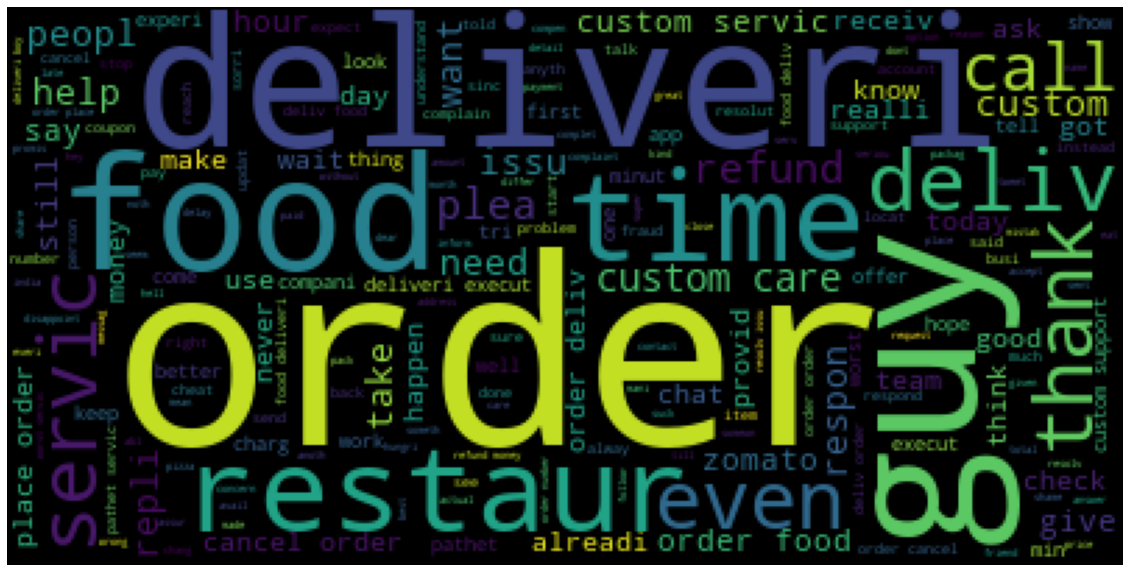

In [21]:
#Let's look at the word cloud of tweets
text_corpus = ' '.join(df['full_text'])
from wordcloud import WordCloud
cloud = WordCloud().generate(text_corpus)

plt.figure(figsize=(20,20))
plt.imshow(cloud)

plt.axis('off')
plt.show()

<BarContainer object of 30 artists>

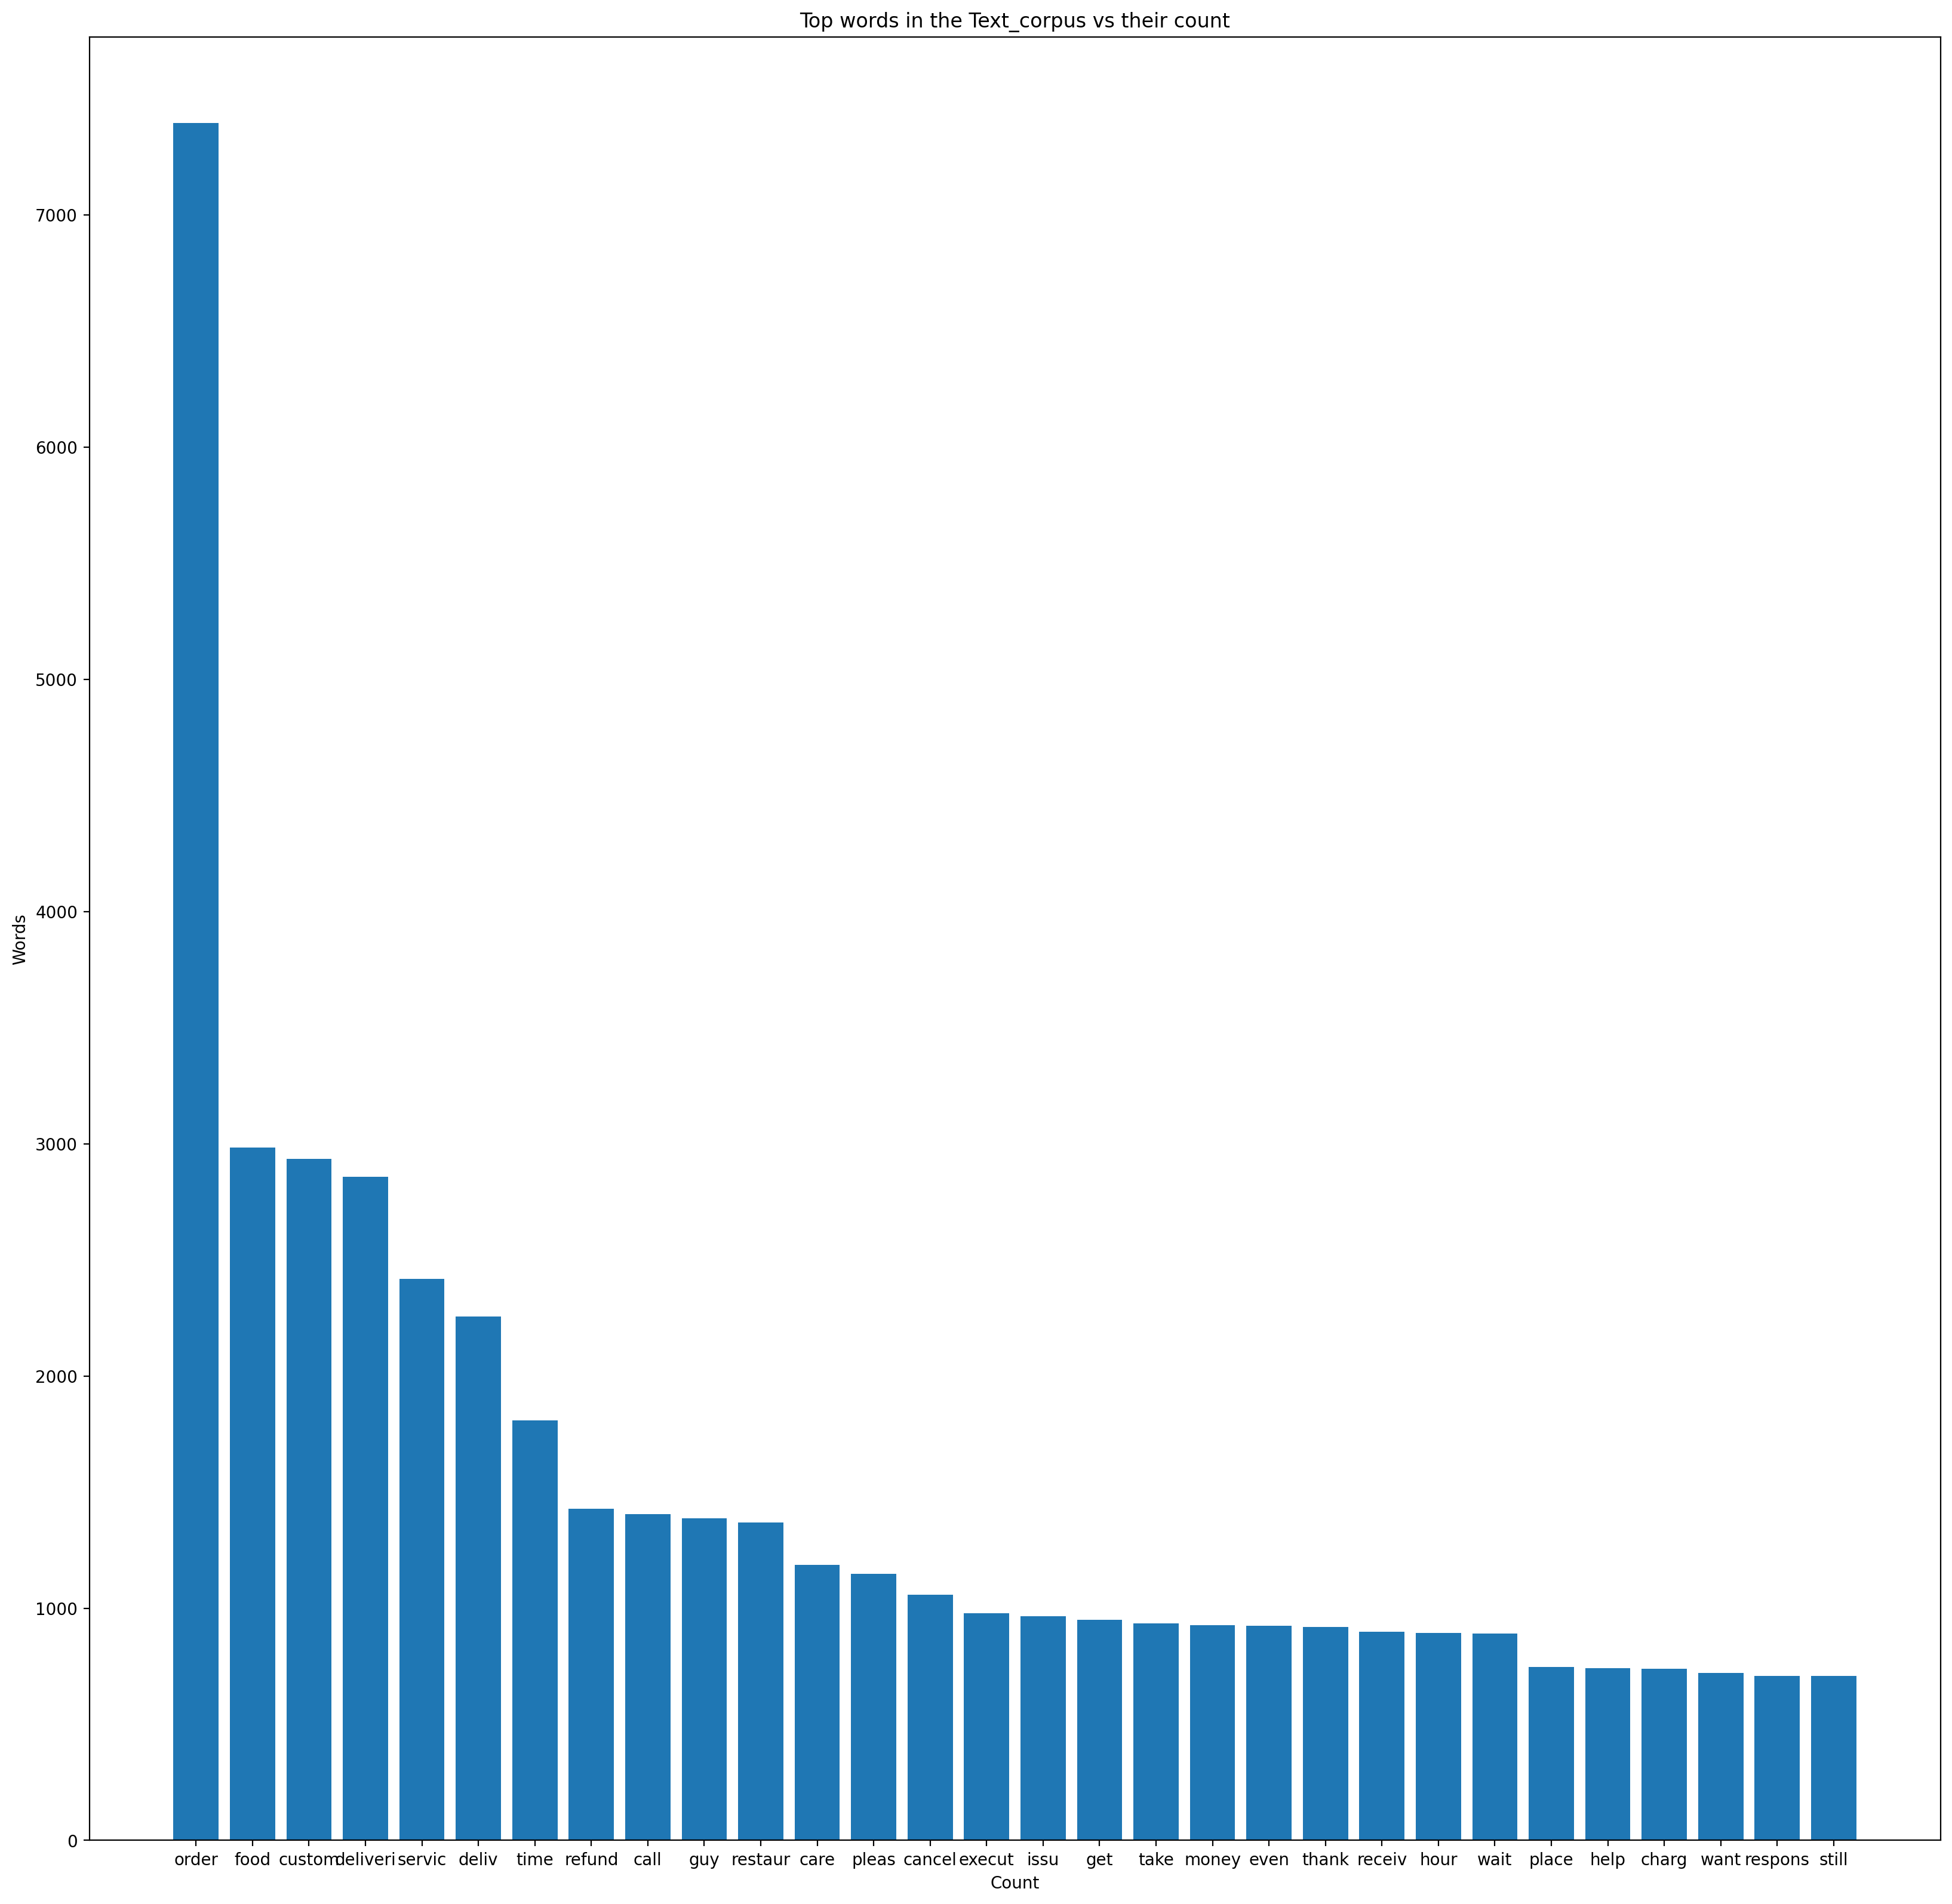

In [22]:
filtered_words = [word for word in text_corpus.split()]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
plt.figure(figsize=(20,20),dpi=200)
plt.title('Top words in the Text_corpus vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)     
   

<BarContainer object of 30 artists>

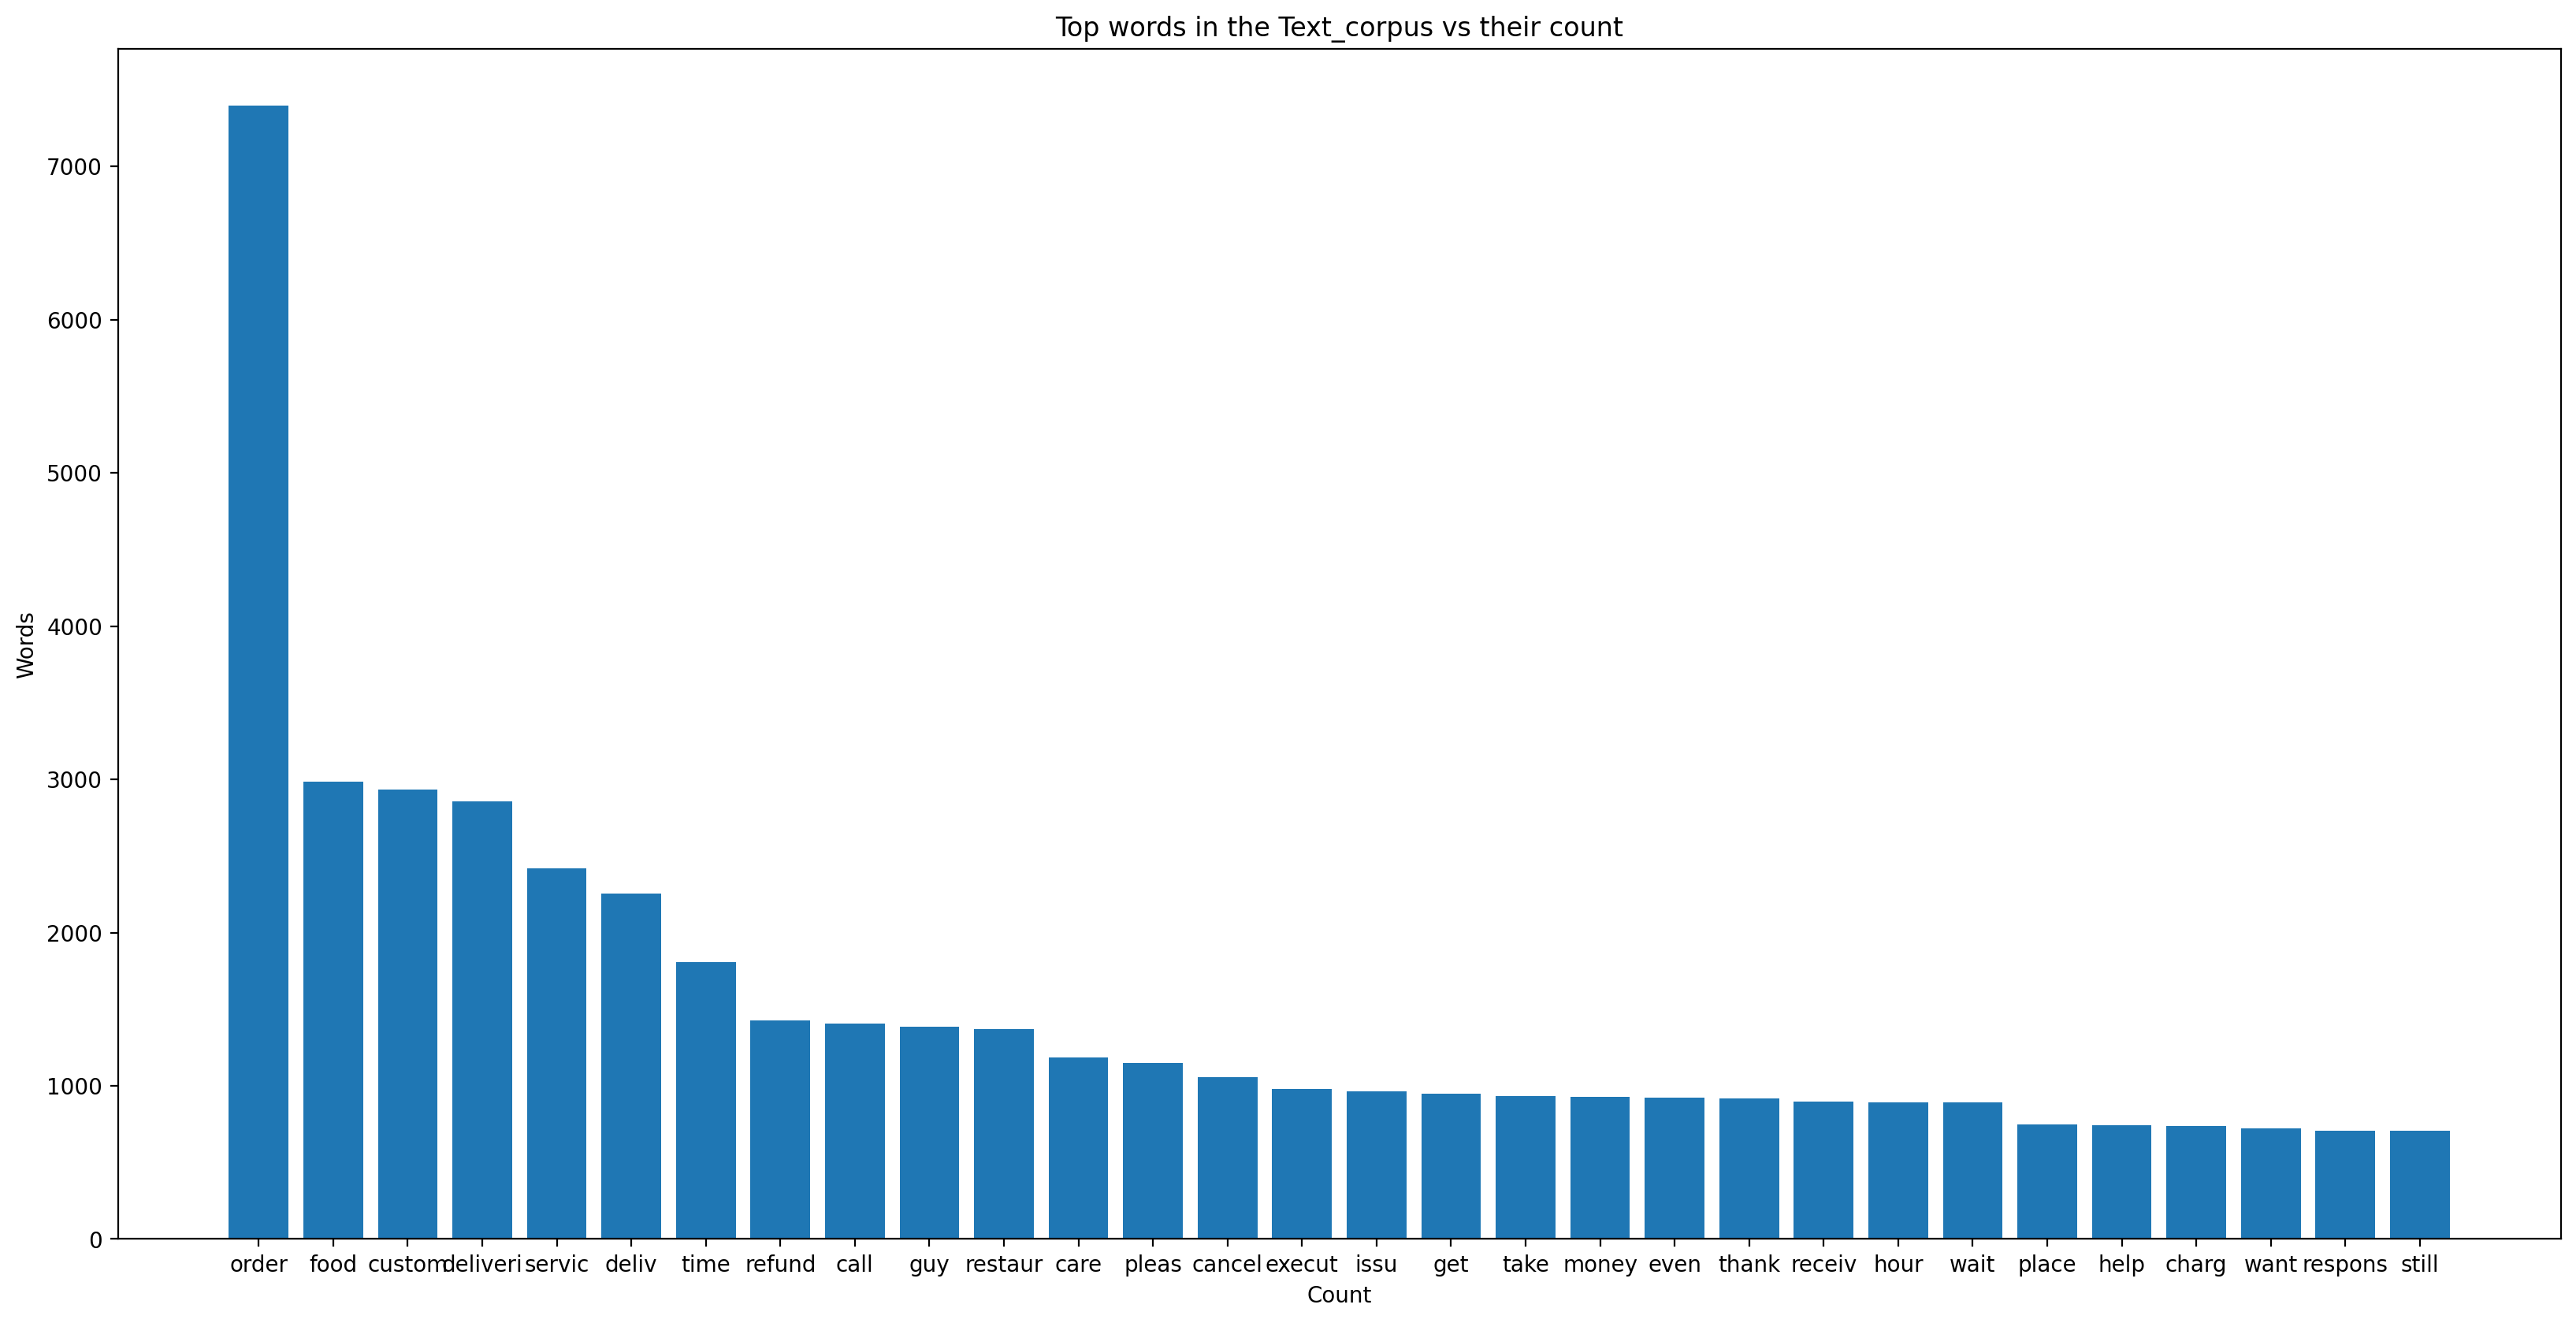

In [23]:
plt.figure(figsize=(20,10),dpi=200)
plt.title('Top words in the Text_corpus vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts) 

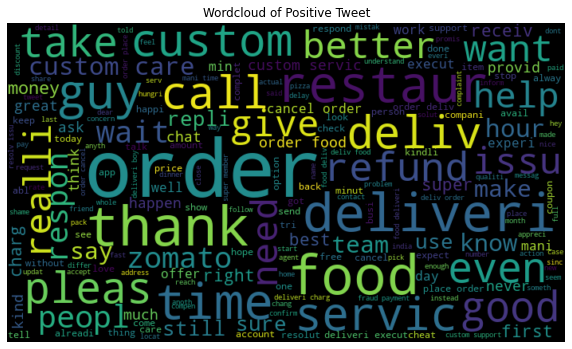

In [24]:
#Let's look at the word cloud of positive reviews

positive = " ".join(df[df.sentiment == 'positive']['full_text'])
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Tweet")
plt.axis('off')
plt.show()


<BarContainer object of 30 artists>

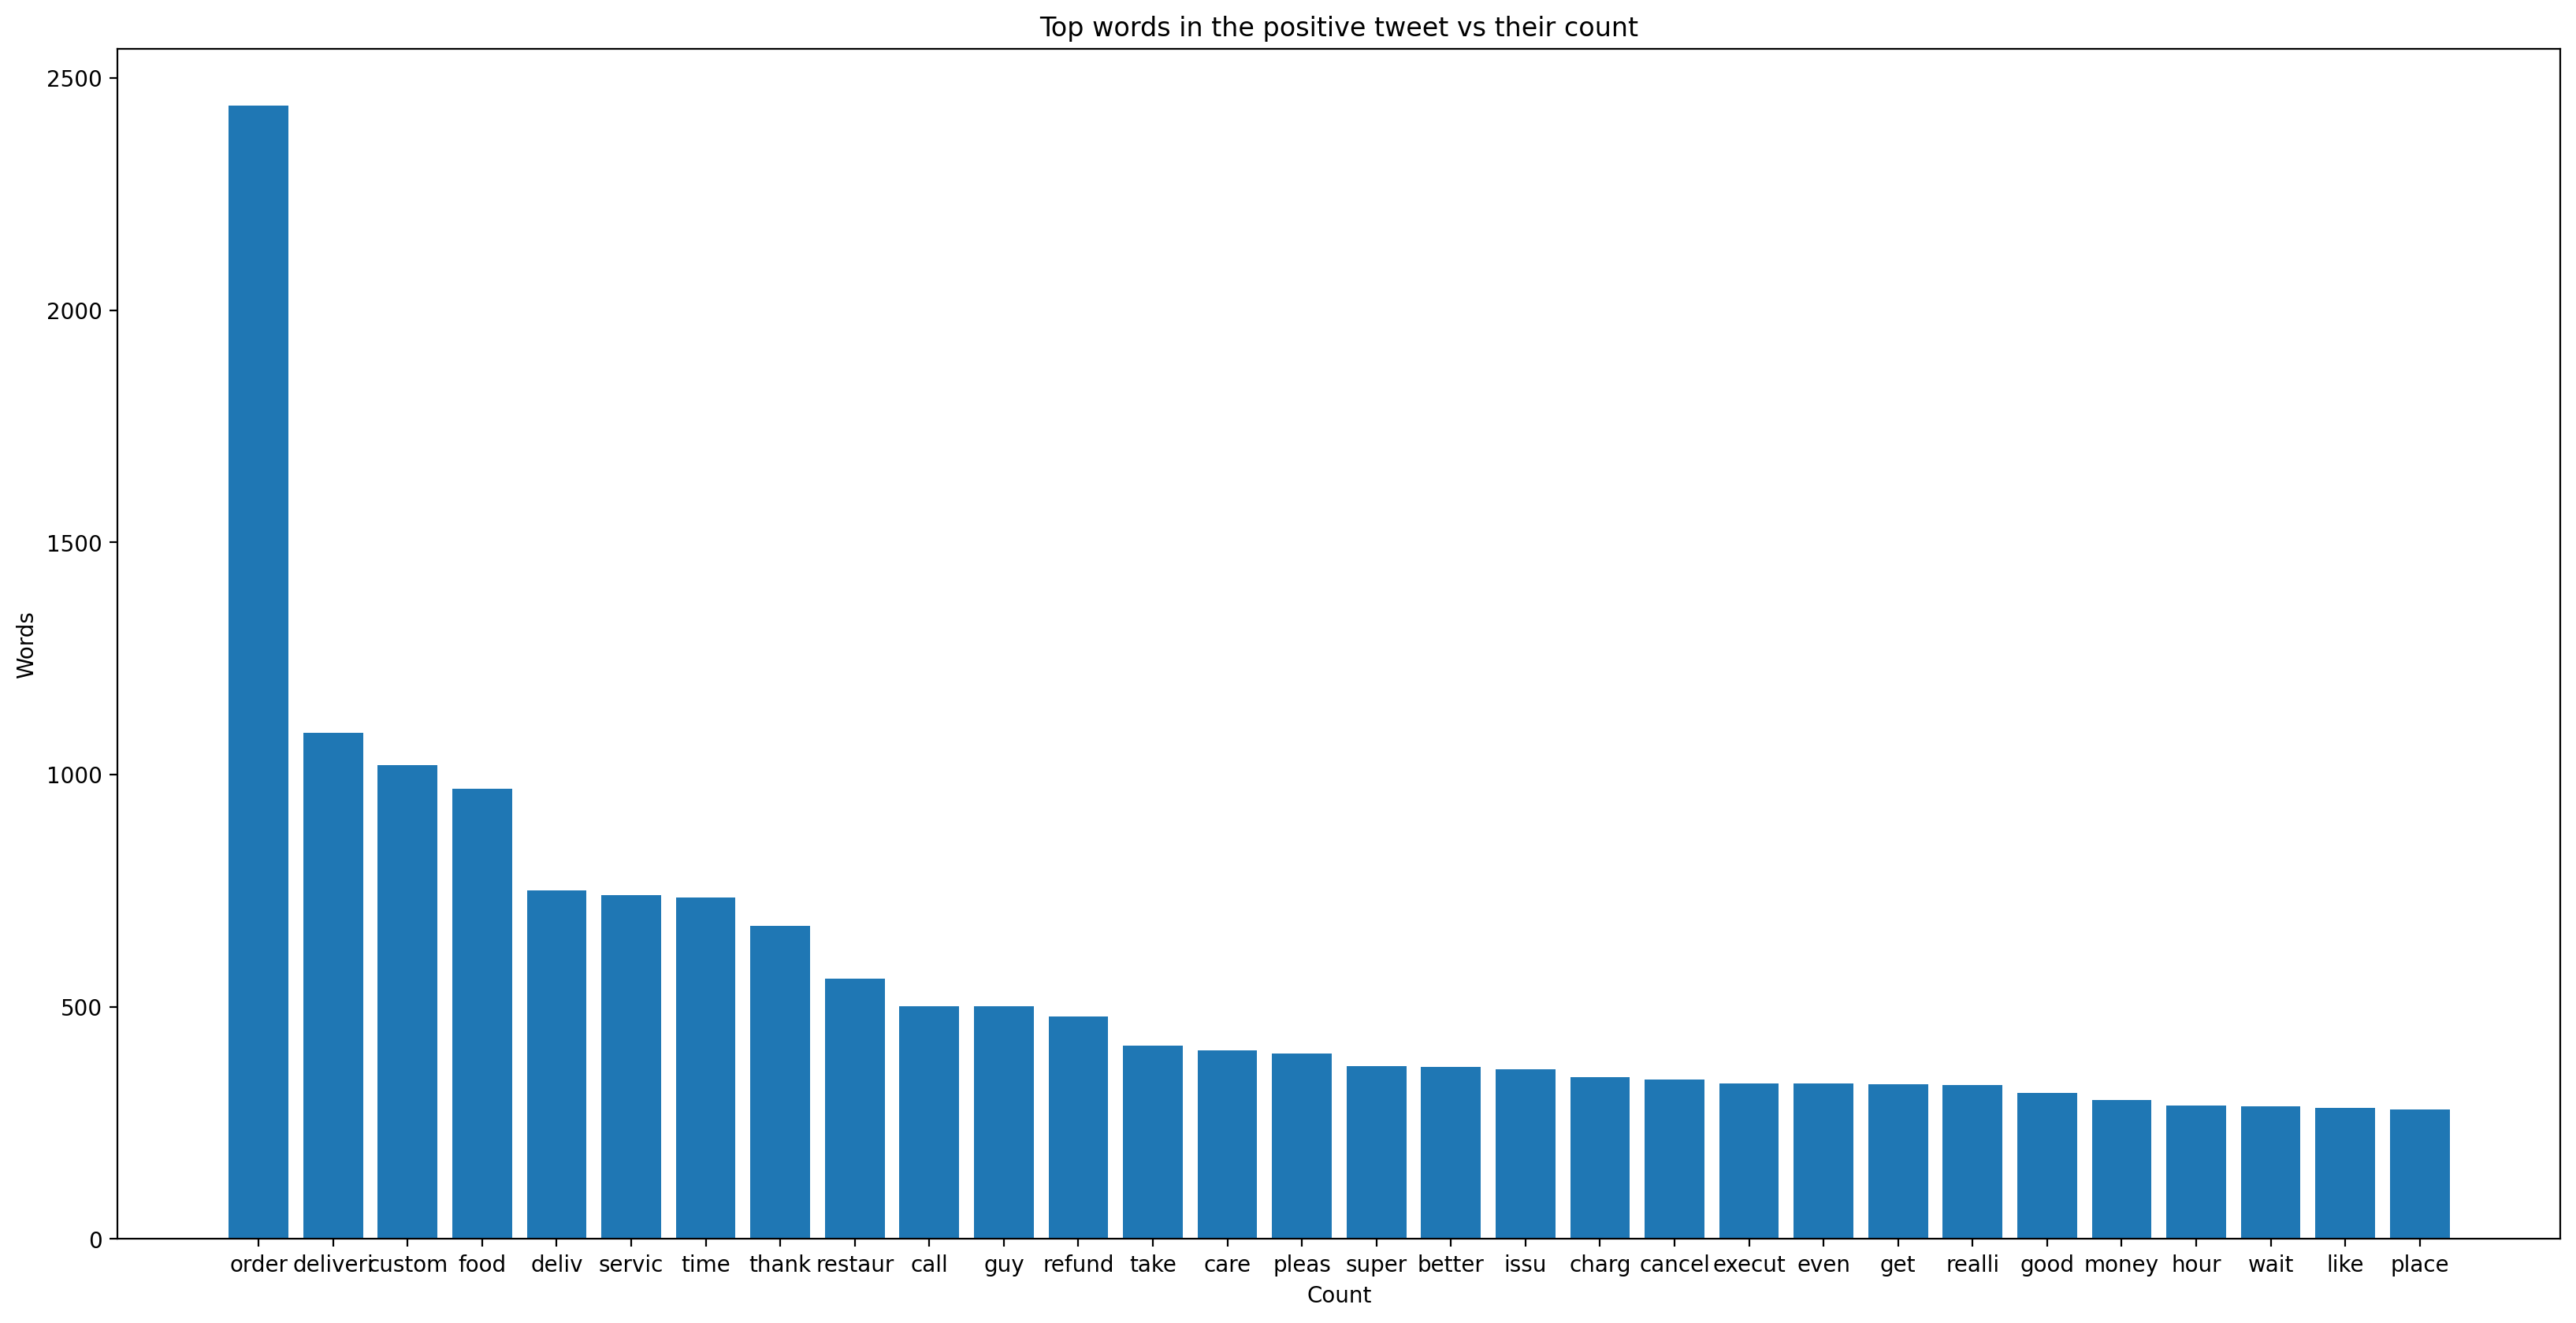

In [25]:
filtered_words = [word for word in positive.split()]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
plt.figure(figsize=(20,10),dpi=200)
plt.title('Top words in the positive tweet vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)     
   

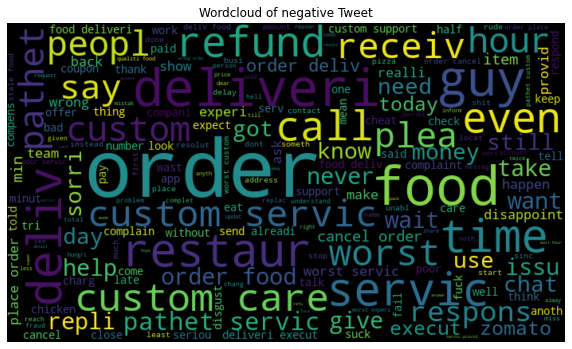

In [26]:
#Let's look at the word cloud of negative reviews

negative = " ".join(df[df.sentiment == 'negative']['full_text'])
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of negative Tweet")
plt.axis('off')
plt.show()

<BarContainer object of 30 artists>

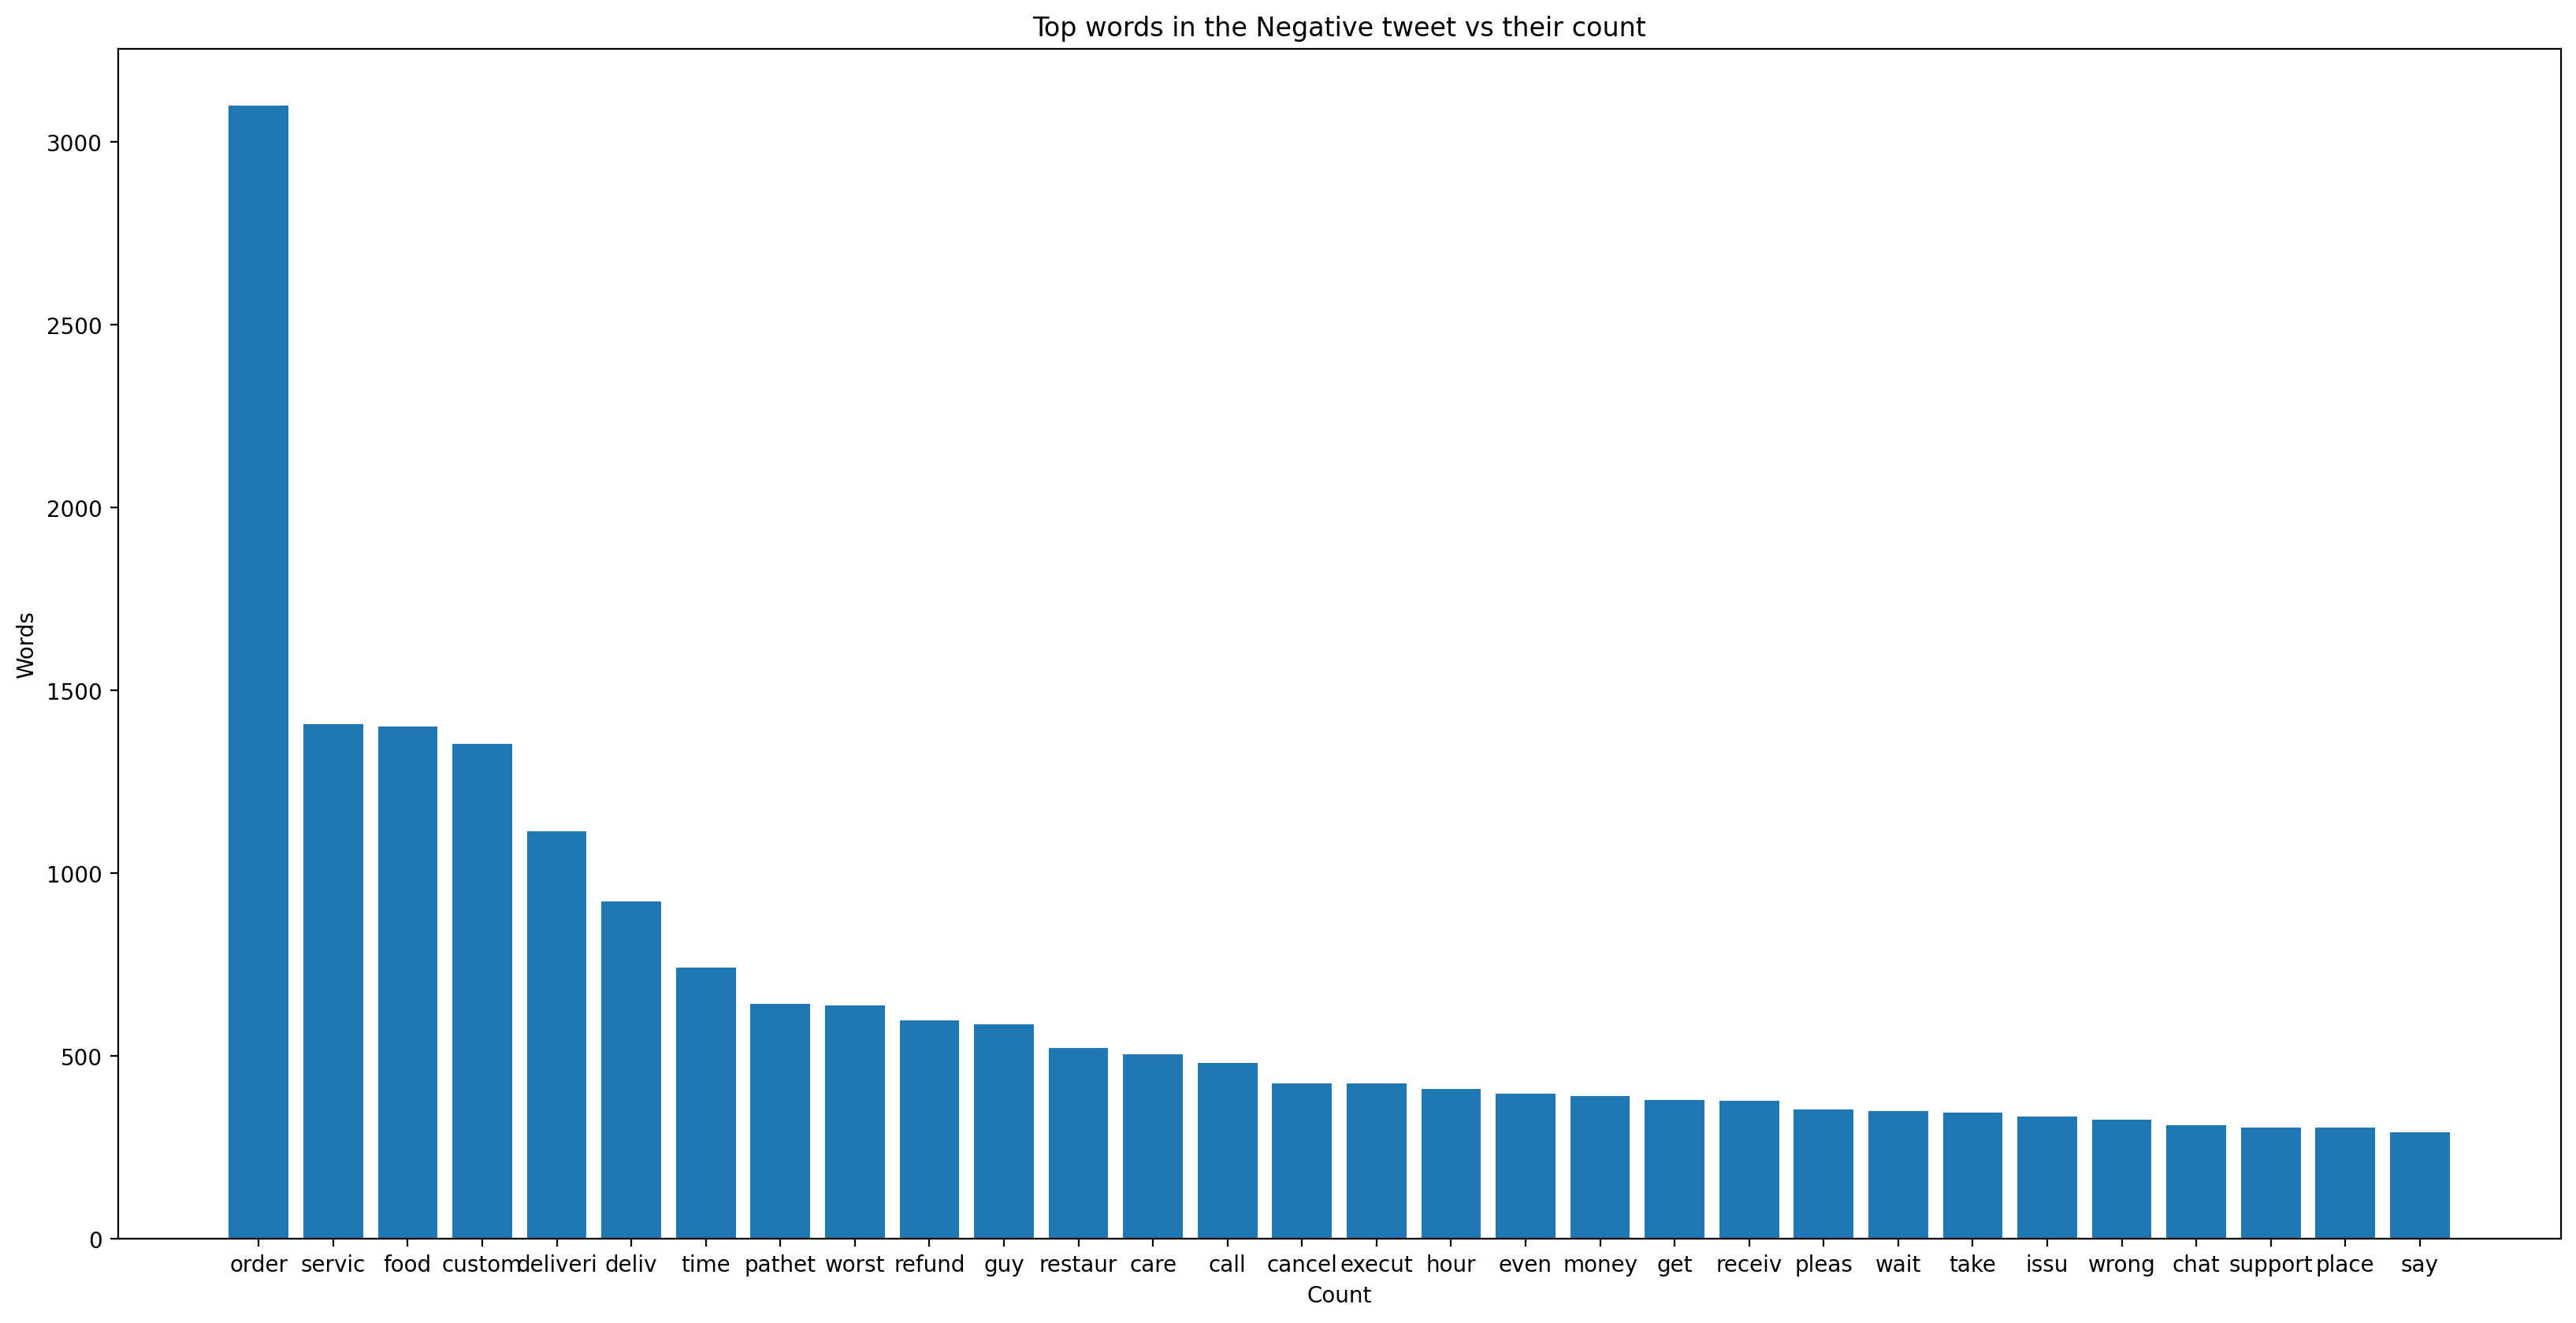

In [27]:
filtered_words = [word for word in negative.split()]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
plt.figure(figsize=(20,10),dpi=200)
plt.title('Top words in the Negative tweet vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)     
   

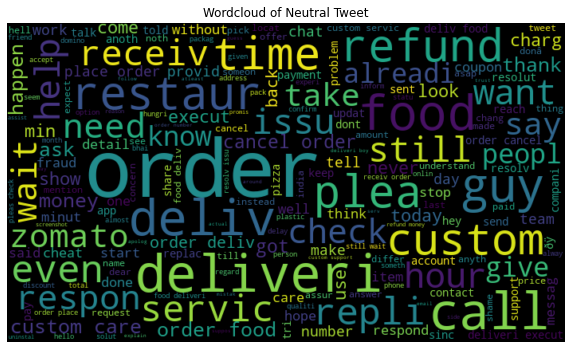

In [28]:
#Let's look at the word cloud of neutral reviews

neutral = " ".join(df[df.sentiment == 'neutral']['full_text'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Tweet")
plt.axis('off')
plt.show()

<BarContainer object of 30 artists>

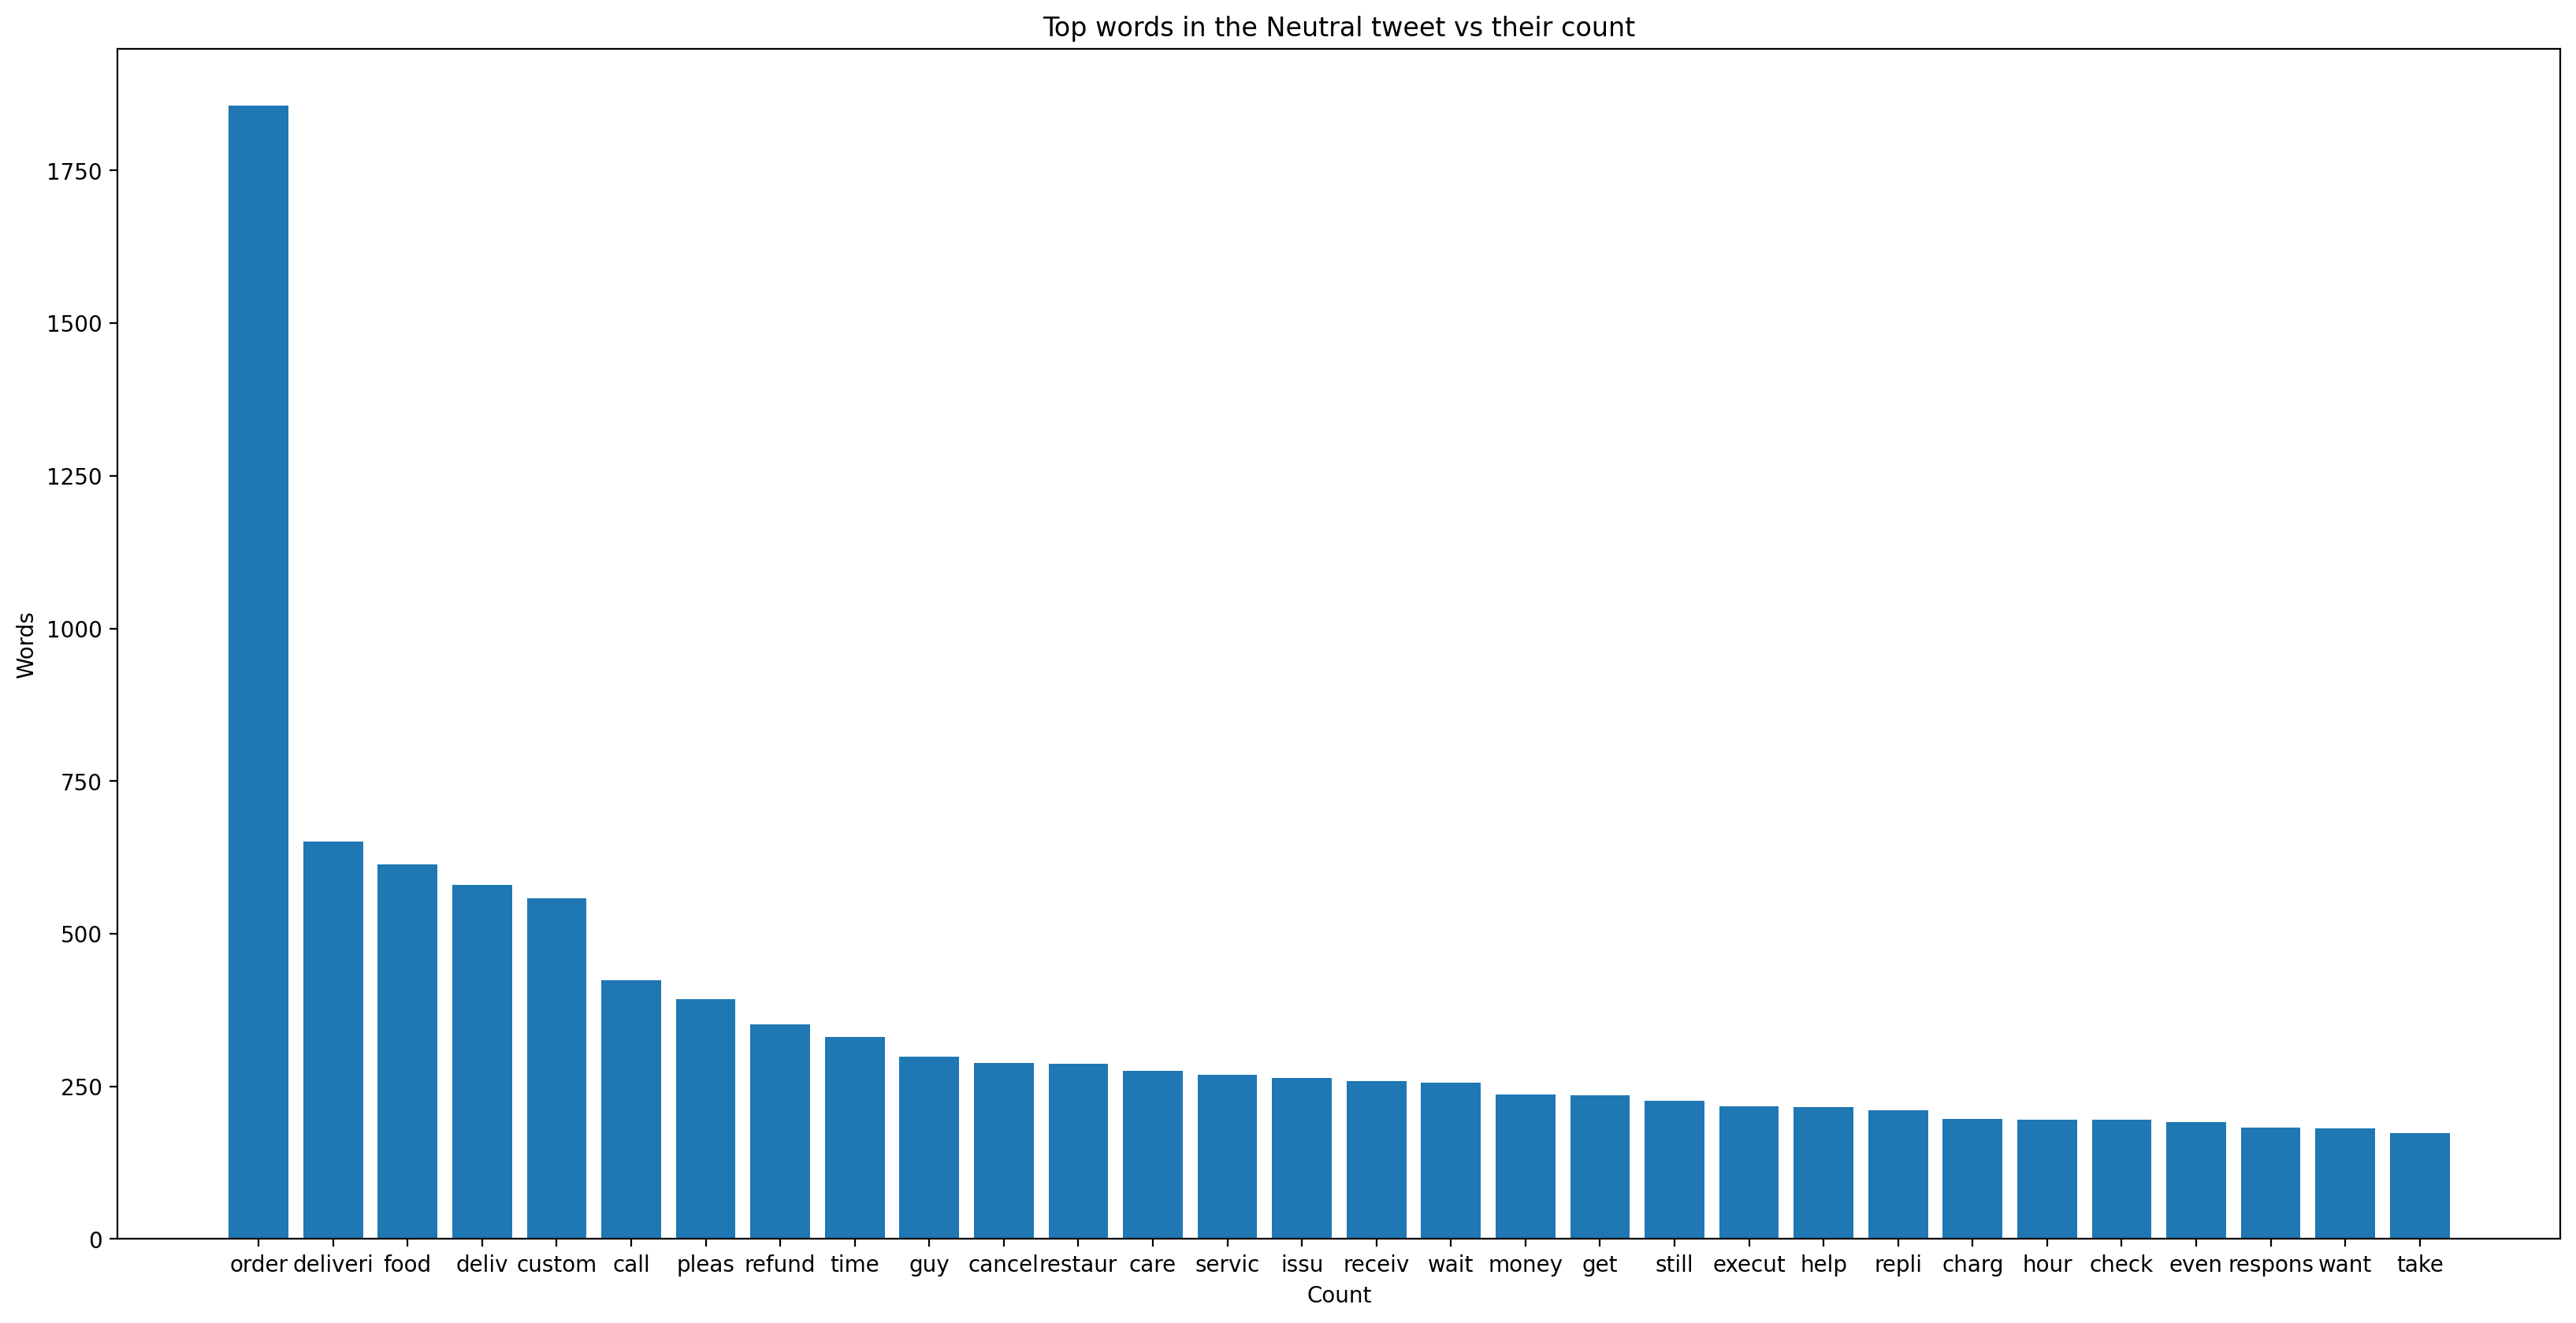

In [29]:
filtered_words = [word for word in neutral.split()]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
plt.figure(figsize=(20,10),dpi=200)
plt.title('Top words in the Neutral tweet vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)     
   

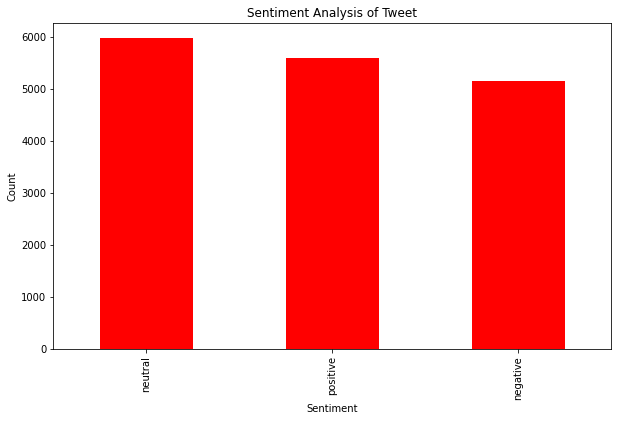

In [30]:
#Sentiment analysis
plt.figure(figsize = (10,6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['sentiment'].value_counts().plot(kind = 'bar',color='red')
plt.title("Sentiment Analysis of Tweet")
plt.show()

In [31]:
#all positive tweets in descending order according to polarity
j=0
sorteddf=df.sort_values('polarity',ascending=False)
pos=sorteddf[sorteddf['sentiment']=='positive']['full_text']
pos.head(10)

14983                 thank hope best promis issu resolv
8534                               thank awesom deliveri
6264                                     thank help best
6260      dude compliment donâ€ bother guy fuckin awesom
8791                         best option main delet diya
11747    sinc heard team uninstal app anyhow best servic
5094                                     felt happi read
78                                         excel support
15463                place order pmstill min best servic
4882                                       impress autom
Name: full_text, dtype: object

In [32]:
#all negative tweets in ascending order according to polarity which we have to react
sorteddf=df.sort_values('polarity',ascending=True)
neg=sorteddf[sorteddf['sentiment']=='negative']['full_text']
neg.head(11)

7641     worst deliveri system custom thereâ€ liter ord...
13331    pathet experi order 8pm 9pm call issu order ca...
9025     worst experi amount debit food deliv cancel ch...
10300    hour place order food still even prepar pathet...
10036                              guy worst custom servix
8033     pleas send link rais request close pathet account
9681                             worst custom experi thank
3952     wait hour say find rider shame guy pathet guy ...
3951                  need improv alreadi uninstal disgust
8305                                stop eat disgust place
2056            pathet servic given order deliv show deliv
Name: full_text, dtype: object

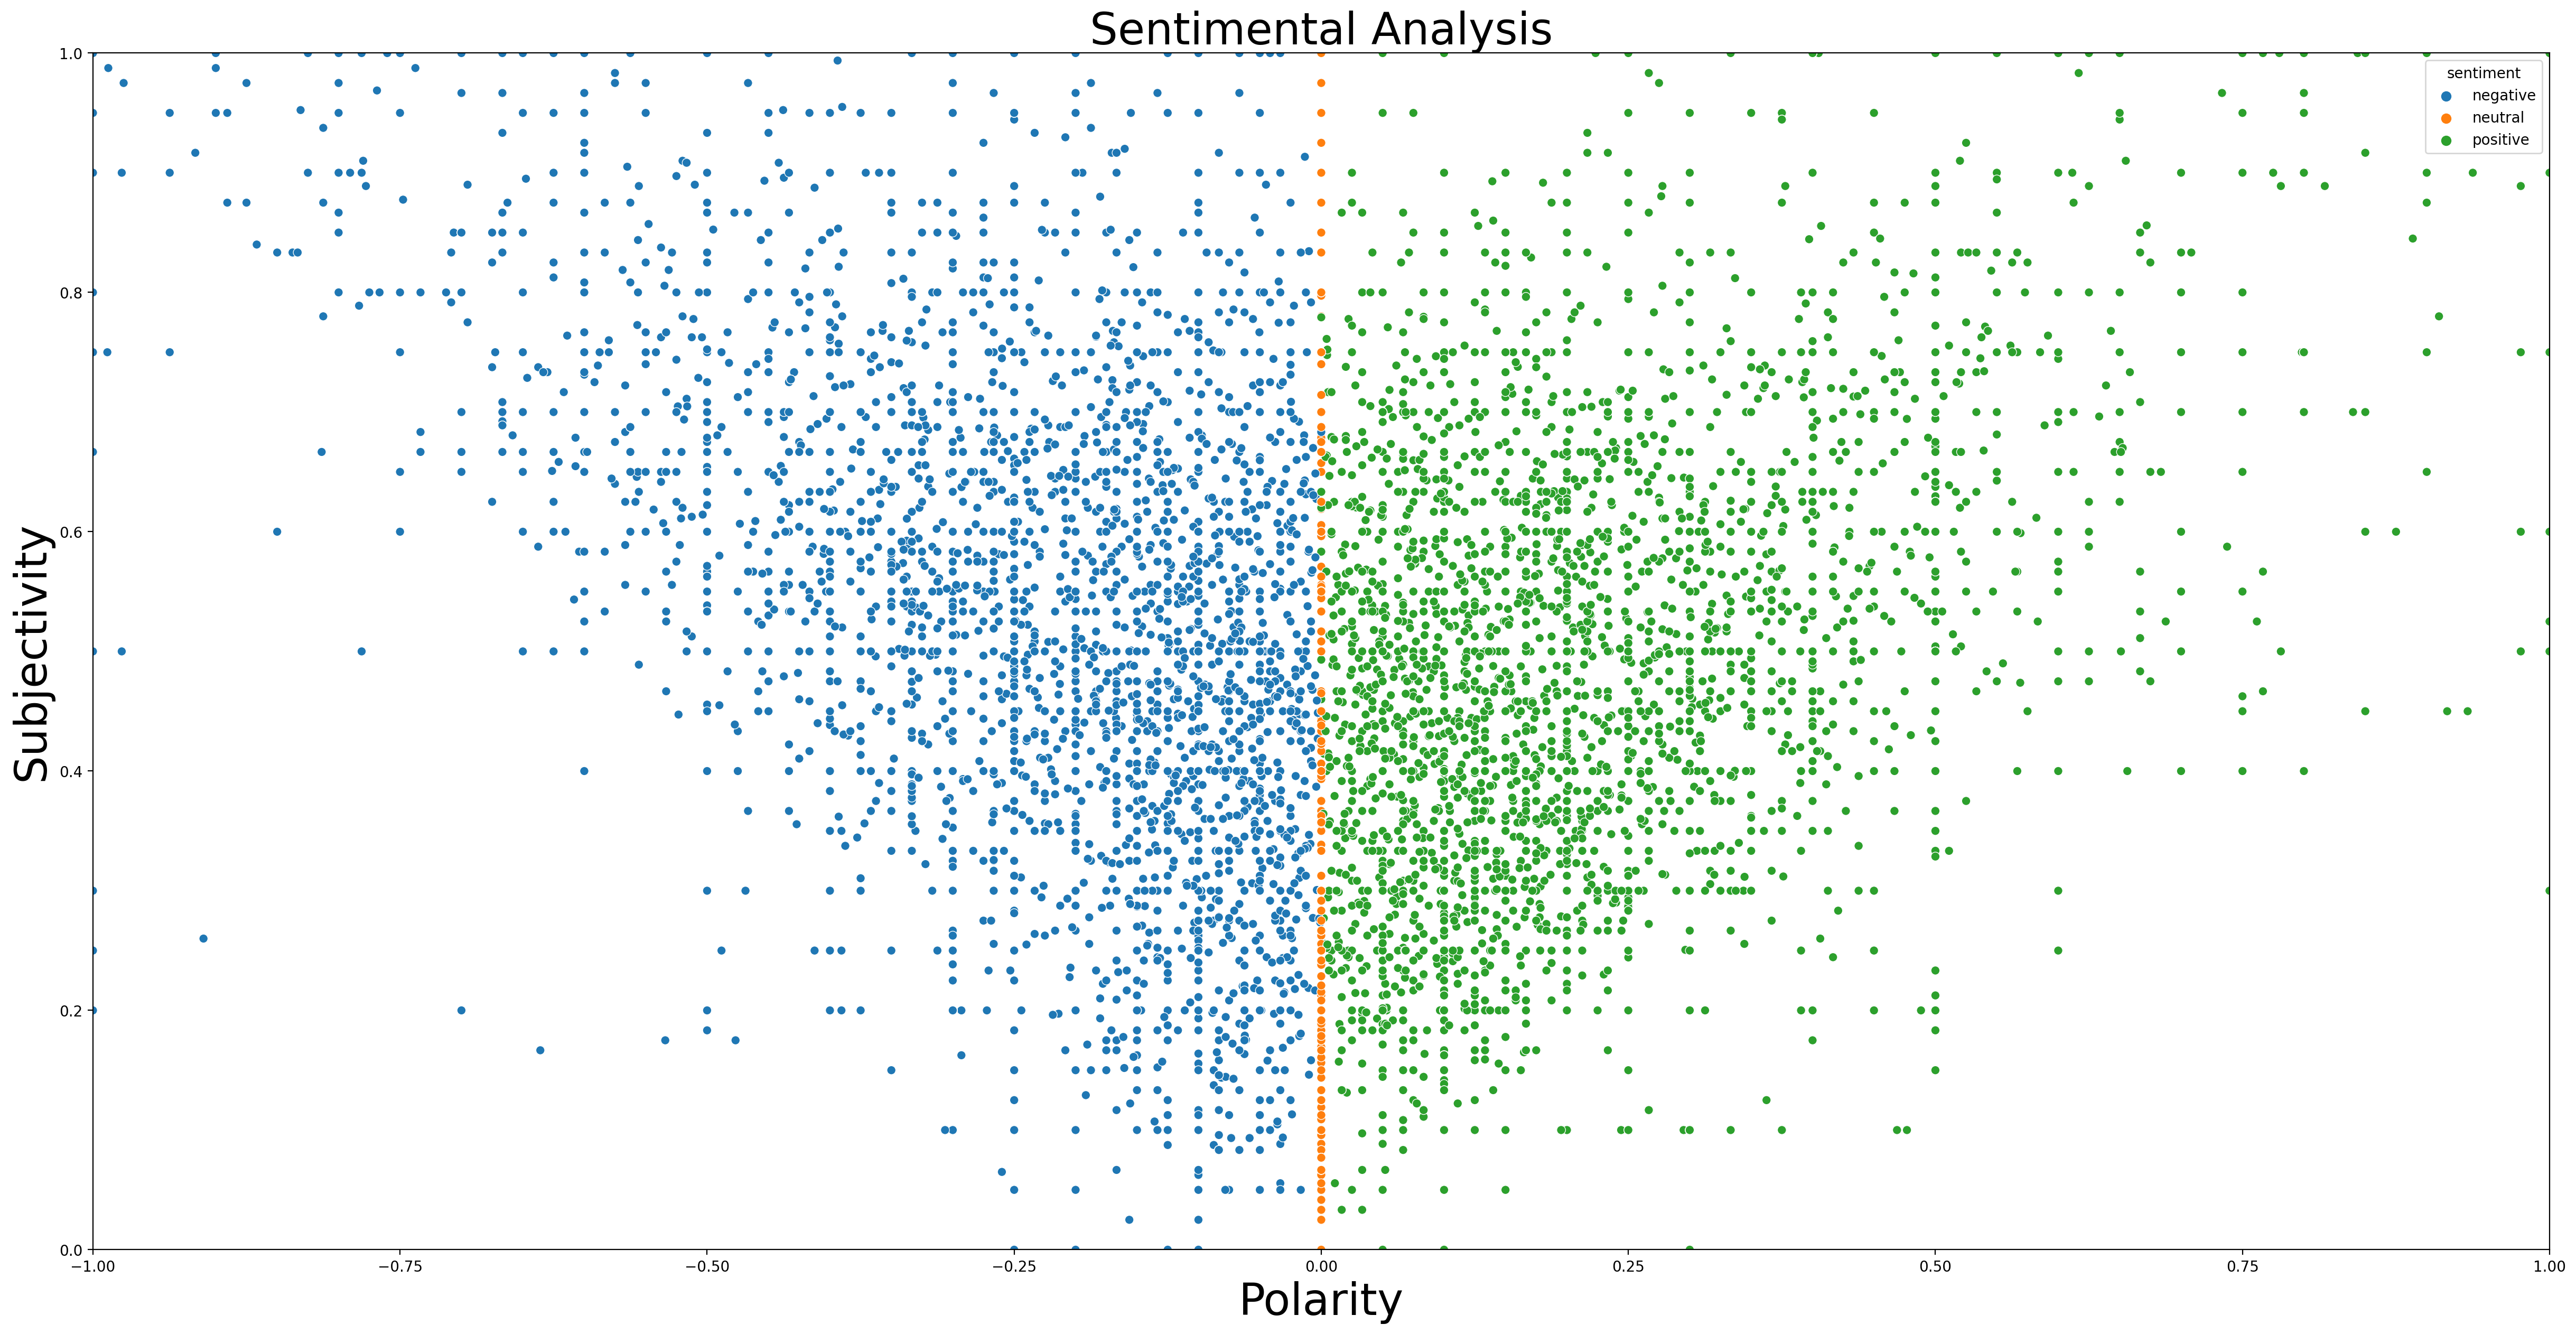

In [33]:
plt.figure(figsize=(30,15),dpi=200)
sns.scatterplot(x=df['polarity'],y=df['subjectivity'],hue=df['sentiment'])
plt.xlim(-1,1)
plt.ylim(0,1)
plt.xlabel('Polarity',fontsize=30)
plt.ylabel('Subjectivity',fontsize=30)
plt.title('Sentimental Analysis',fontsize=30)
plt.show()

In [34]:
positive_tweet_percentage=np.round((df['sentiment'].value_counts()[1]*100)/df.shape[0],2)
positive_tweet_percentage

33.48

In [35]:
negative_tweet_percentage=np.round((df['sentiment'].value_counts()[2]*100)/df.shape[0],2)
negative_tweet_percentage

30.8

In [36]:
neutral_tweet_percentage=np.round((df['sentiment'].value_counts()[0]*100)/df.shape[0],2)
neutral_tweet_percentage

35.72

In [37]:
#most recent most negative tweet which we have to react
sort_value=df.sort_values(['date','followers_count','polarity'],ascending=[False,False,True])
most_negative_tweet=sort_value[sort_value['sentiment']=='negative']['full_text']
most_negative_tweet.head()

14875            worst custom servic worst deliveri system
14876    dont know custom care give ratâ€ ass custom op...
14878    disgust servic order chines rice receiv chicke...
14879    worst ever servic deliv food minut pick also d...
14880    boycot order food today worst experi ever ride...
Name: full_text, dtype: object